In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

#VARIABLES
delta_time = 5
L=0.09
file_path = '../Out-N500-L0.09-ITER500000-POST50-wallEvents-w-0.09.txt'
save_to="./FINALFINAL-"

sns.set_style("darkgrid")


In [38]:
#TODO: calculate delta_time as avg time in which 500 events happpen

In [39]:
#the code
latest_timestamp = 0
#Parse the .txt file
data = []  # Store the parsed data as (timestamp, velocity, container_id) tuples
with open(file_path, 'r') as file:
    lines = file.readlines()
    i = 0
    j = 0

    while i < len(lines):
        #print(lines[i])
        if j == 0 :
          readTimestamp = float(lines[i].strip())
          latest_timestamp = readTimestamp
          j = 1
        elif j == 1 :
          parts = lines[i].split()
          readVelocity = float(parts[0])
          readContainer_id = int(parts[1]) - 1
          data.append((readTimestamp, readVelocity, readContainer_id))
          j = 0

        i += 1


#Group data by container ID
container_data = {}
for timestamp, velocity, container_id in data:
    if container_id not in container_data:
        container_data[container_id] = []
    container_data[container_id].append((timestamp, velocity))

time_arrays = {}
steps = []
#Build time series
for container_id, container_values in container_data.items():
    timestamps, velocities = zip(*container_values)
    num_steps = int(latest_timestamp / delta_time) + 1

    time_series = [(0.0) for i in range(num_steps)] #(i*delta_time, 0.0)
    steps = [(i*delta_time) for i in range(num_steps)] #build array with all time steps

    vertical_sides = 0
    if container_id == 0:
        vertical_sides = 0.09 + (0.09 - L)
    elif container_id == 1:
        vertical_sides = L

    index = int(timestamps[0] / delta_time) + 1
    buffer = 0

    for timestamp, velocity in zip(timestamps, velocities):
        new_index = int(timestamp / delta_time) + 1
        if index != new_index:
            sum_impulse = buffer  #sum velocities
            avg_p = sum_impulse /(delta_time*(2*0.09 + vertical_sides)) #average pressure
            #time_series[index] = buffer / number #average pressure
            time_series[index] = (avg_p)
            index = new_index
            buffer = 0

        buffer = buffer + velocity

    #print("time series ", container_id, time_series)
    #remove first time step, since t=0 has no previous times to add events from
    steps.pop(0)
    time_series.pop(0)
    time_arrays[container_id] = time_series


[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520]
CONTAINER  0 [2.9573803345958742, 0.4730550665425297, 0.24189508946738386, 1.038256101719836, 2.159011382245712, 1.4167931037960901, 0.8899081339714695, 0.9978310298035785, 1.5895828677215684, 1.5780275655042557, 1.157307222458551, 0.9545743421386076, 1.5231991660624307, 1.492479045362946, 1.2939282886741628, 1.196557144124575, 1.2418949876316432, 1.4970384764597486, 1.36655806548552, 1.2237763396155785, 1.1196204695465772, 1.3010976525514737, 1.5500675973020308, 1.3786437784962153, 1.132658796

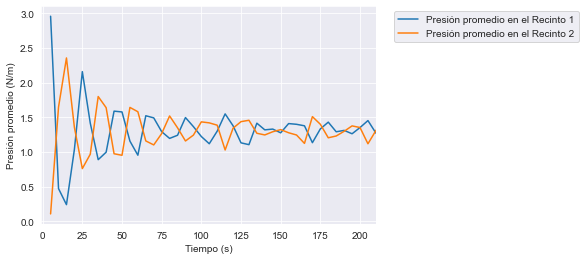

In [40]:
#Plotting
plt.tight_layout()
print(steps)
print("CONTAINER ", 0, time_arrays[0])
plt.plot(steps[:len(time_arrays[0])], time_arrays[0], label=f'Presión promedio en el Recinto 1')

print("CONTAINER ", 1, time_arrays[1])
plt.plot(steps[:len(time_arrays[1])], time_arrays[1], label=f'Presión promedio en el Recinto 2')

plt.xlim((-1, 210))

plt.xlabel('Tiempo (s)')
plt.ylabel('Presión promedio (N/m)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
fname = save_to + "pressure-500-L-" +str(L) + "-dt-" + str(delta_time) + ".png"
plt.savefig(fname, bbox_inches='tight', dpi=300)
plt.show()